In [1]:
import os
import random
import matplotlib.pyplot as plt
import numpy as np

In [146]:
def find_npy_file(path, file, band):
    """
    Returns the string name of another file from the same time for a given GOES band npy file,
    or None if there is no such file in the given directory.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    
    Parameter band: GOES band the returned file should be from
    Precondition: band is a string of length 2
    """
    for x in os.listdir(path):
        if x[19:21] == band and file[27:41]==x[27:41]:
            return x

def find_07and14(path, seed = None):
    """
    Returns loaded .npy of bands 07 and 14.
    
    Parameter path: The path where the returned file is located in
    Precondition: path is a string to a directory relative to the current one, with .npy files
    
    Parameter file: A file from the same time the returned file should have
    Precondition: file is a string with the name of the original file, and includes the path
    """
    file07 = None
    file14 = None
    if type(seed) != type(None):
        np.random.seed(seed)
    while file07 == None or file14 == None:
        file = random.choice(os.listdir('../../GOES_Files/npy_files'))
        file07 = find_npy_file('../../GOES_Files/npy_files', file, '07')
        file14 = find_npy_file('../../GOES_Files/npy_files', file, '14')
    file07 = np.load('../../GOES_Files/npy_files/' + file07)
    file14 = np.load('../../GOES_Files/npy_files/' + file14)
    return file07, file14

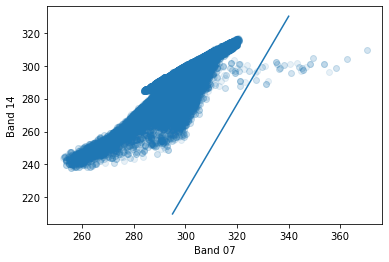

In [229]:
for n in range(1):
    np.random.get_state()[1][1]
    img07, img14 = find_07and14('../../GOES_Files/clear_sky_mask/', np.random.seed())
    
#     if n == 0:
#         total07 = img07
#         total14 = img14
#     else:
#         total07 = np.concatenate((total07, img07))
#         total14 = np.concatenate((total14, img14))
    
    
    plt.scatter(img07, img14, alpha=0.1)
    
plt.plot([295, 340], [210, 330], label='fires')
plt.xlabel('Band 07')
plt.ylabel('Band 14')
plt.show()

In [252]:
# def fire_threshold(img07, img14):
#     m = (330-210)/(335-295)
#     b = 210 - m*295
#     points = []
#     img07ravel = img07.ravel()
#     img14ravel = img14.ravel()
#     for x in range(500*500):
#         if img14ravel[x] < m*img07ravel[x] + b:
#             points.append(x)
#     return points

def fire_threshold(img07, img14):
    m = (330-210)/(340-295)
    b = 210 - m*295
    points = []
#     for x in range(500):
#         for y in range(500):
#             if img14[x][y] < m*img07[x][y] + b:
#                 points.append((x,y))
    
    fire_mask = (img14) < (m*img07 + b)
    points = np.array(fire_mask.nonzero()).T
    
    for point in points:
        save = point[0]
        point[0] = point[1]
        point[1] = 500 - save
    
    return points

In [253]:
fires = fire_threshold(img07, img14)

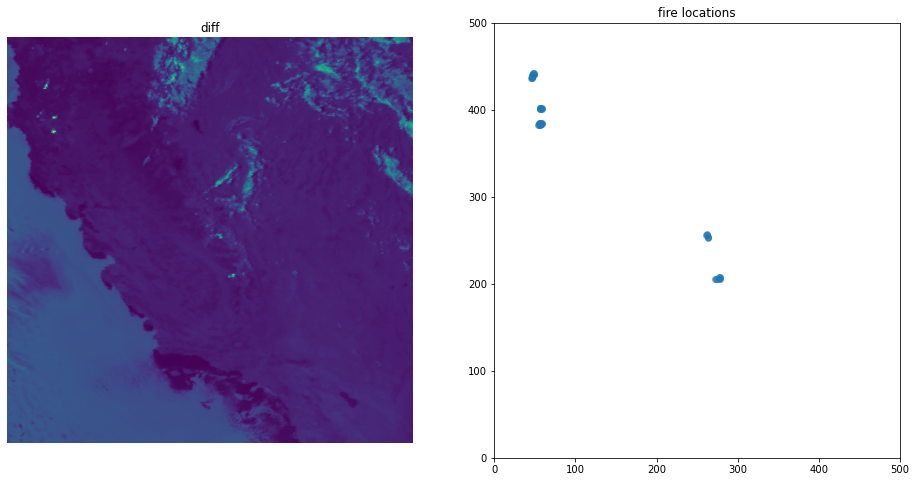

In [254]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1]})

diff = img07 - img14
ax[0].imshow(diff, aspect='equal')
ax[0].set_title('diff')
ax[0].axis('off')

ax[1].set_xlim([0, 500])
ax[1].set_ylim([0, 500])
ax[1].scatter([x[0] for x in fires], [x[1] for x in fires], alpha=0.5)
ax[1].set_title('fire locations')

plt.show()